**Runge Kutta Order 4**

\begin{eqnarray*}
\frac{\partial y}{\partial t} & = & f(t,y) \\
k_{1} & = &  f(t_{n},y_{n}) \\
k_{2} & = &  f\left(t_{n}+\frac {h}{2}, y_{n}+h \frac {k_{1}}{2}\right) \\
k_{3} & = &  f\left(t_{n}+\frac {h}{2},y_{n}+h\frac {k_{2}}{2}\right) \\
k_{4} & = &  f\left(t_{n}+h,y_{n}+hk_{3}\right) \\
t_{n+1} & = &  t_{n} + h  \\
y_{n+1} & = &   y_{n} + \frac{h}{6} \left( k_{1} + 2k_{2} + 2k_{3} + k_{4} \right)
\end{eqnarray*}




In [1]:
import numpy as np
import copy

# note we consider y and f a vector valued function

def rkstep(t,y,h,f):
    k1 = f(t,y)
    k2 = f(t+h/2.,y+h*k1/2.)
    k3 = f(t+h/2.,y+h*k2/2.)
    k4 = f(t+h,y+h*k3)
    y+= h*(k1+ 2*k2+2*k3+k4)/6.
    return(y)

def rkstepTrace(t,y,h,f):
    print("Trace: ------ START")
    print("%-10s"%"t,y,h",t,y,h)
    k1 = f(t,y)
    print("%-10s"%"k1",k1)
    k2 = f(t+h/2.,y+h*k1/2.)
    print("%-10s"%"k2",k2)
    k3 = f(t+h/2.,y+h*k2/2.)
    print("%-10s"%"k3",k3)
    k4 = f(t+h,y+h*k3)
    print("%-10s"%"k4",k4)
    print("Trace: ------ STOP")
    y+= h*(k1+ 2*k2+2*k3+k4)/6.
    return(y)

def SolveRK(t0,t1,h,y0,f,eps=1.e-10, NrEval = 100000):
    # Will give back an array of values x and y where y is a vecor
    xSol = []
    ySol = []
    iEval = 1
    y = y0
    t = t0
    xSol.append(t)
    ySol.append(copy.deepcopy(y))
    while(t<=t1-eps): 
        #print(t, y)
        if (iEval % NrEval == 0): 
            print("Eval %6d:"%iEval,t,y)
        iEval+=1
        y=rkstep(t,y,h,f)
        t+=h
        xSol.append(t)
        ySol.append(copy.deepcopy(y))
    return(xSol,ySol)
        

**Simple Test**

\begin{eqnarray}
\frac{\partial^2}{\partial x^2}f & = &  -f \\
\vec{y} &=& (y, y')
\end{eqnarray}


Solution $y(t) = \alpha \sin(t) + \beta \cos(t)$

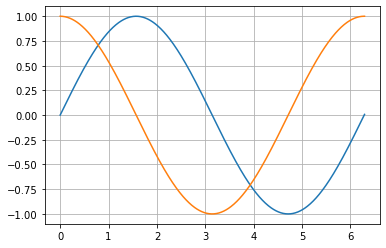

In [2]:
def fTest(t,y):
    z=np.zeros(2)
    z[0] = y[1]
    z[1] = -1*y[0]
    return(z)

y0 = np.zeros(2)
y0[1] = 1
# This is sin
h= 0.01
(x,y) = SolveRK(0,3.1415*2,h,y0,fTest)

import matplotlib.pyplot as plt
yy = []
plt.plot(x,y)
plt.grid(True)

In [3]:
#Note the following is a somewhat dangerous code, since we use the side effect to
#bring it into the function
A = 1.2500 # as choice for 1 + rand()
B = 7.7500 # as choice for 6 + 3*rand()
xEq = A
yEq = B/A

def fBruss(t,y):
    xi = y[0]
    eta = y[1]
    z=np.zeros(2)
    z[0] = A - B * xi + xi*xi*eta - xi
    z[1] = B * xi -xi*xi*eta 
    return(z)
    
def plotBrusselator(x0,y0,t0,t1,h, figureNr = 1,col ='b'):
    y0Vec = np.array([x0,y0])
    (xSol, ySol) = SolveRK(t0,t1,h,y0Vec,fBruss)
    ySol = np.array(ySol)
    #print(xSol)
    #print(ySol)
    plt.figure(figureNr)
    plt.subplot(2,1,1)
    plt.plot(xSol,ySol[:, 0],color=col)
    plt.grid(True)
    plt.subplot(2,1,2)
    plt.plot(xSol,ySol[:, 1],color=col)
    plt.grid(True)
    #plt.subplot(3,1,3)
    #plt.plot(ySol[:, 0],ySol[:, 1],color=col)
    #plt.grid(True)
    #plt.plot([xEq],[yEq],'ro')
    plt.figure(figureNr+1)
    plt.plot(ySol[:, 0],ySol[:, 1],color=col)
    plt.plot(ySol[-1, 0],ySol[-1, 1],'p',color=col,markersize=10)
    plt.plot(ySol[0, 0],ySol[0, 1],'d',color=col,markersize=10)
    plt.plot([xEq],[yEq],'ro')
    plt.grid(True)

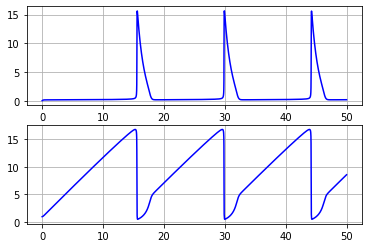

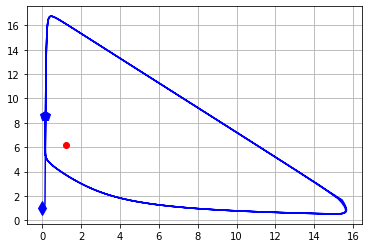

In [4]:
plotBrusselator(0.,1.,0.,50,0.01, figureNr = 1)

Start Points 9.415483220214469 1.9219024829591977
Start Points 3.8293031635782633 5.305174070682098
Start Points 6.189646607979853 1.783987693415821
Start Points 7.35002017254771 8.881942968550284
Start Points 9.637252499338544 5.308643187739273


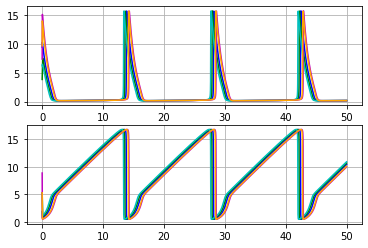

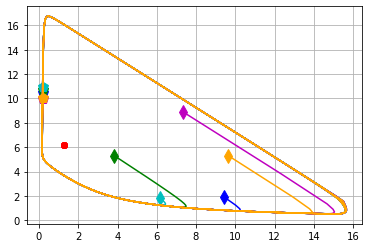

In [5]:
import numpy.random
mycolors = ['b','g','c','m','orange']
for i in range(5):
    xStart = numpy.random.uniform(0,12)
    yStart = numpy.random.uniform(0,12)
    print("Start Points", xStart,yStart)
    plotBrusselator(xStart,yStart,0.,50,0.01, figureNr = 1,col=mycolors[i])


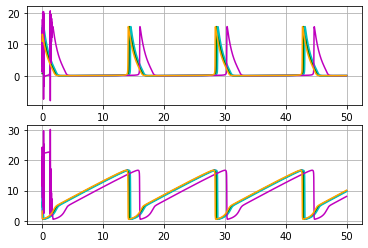

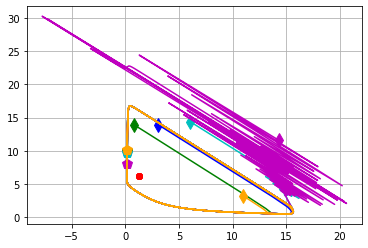

In [6]:
xS =3.0605792955640028 
yS =13.936919347560123
plotBrusselator(xS,yS,0.,50,0.01, figureNr = 1,col=mycolors[0])
xS =0.819395114919424 
yS =13.893837368769264
plotBrusselator(xS,yS,0.,50,0.01, figureNr = 1,col=mycolors[1])
xS =6.050690787328797 
yS =14.386176436932448
plotBrusselator(xS,yS,0.,50,0.01, figureNr = 1,col=mycolors[2])
xS =14.285834925006858 
yS =11.617912155350217
plotBrusselator(xS,yS,0.,50,0.01, figureNr = 1,col=mycolors[3])
xS =11.008009804466127 
yS=3.2236495521738027
plotBrusselator(xS,yS,0.,50,0.01, figureNr = 1,col=mycolors[4])

**Convergence**

Depending on choice of $x_0,y_0$ differential equation and hence nummerical solution converges. See text.
We see that at the bounday of radius of convergence oscillation starts and father way solution of approximation diverges

**4th Order how can we see in absence of exact solution**\

When assuming that the solution is exact for a very small h we can calculate for higher errors. We will use h=1e-6 as reference and evaluate errors for $h=10^{-k}$

In [7]:
hVec = [0.1,0.01,0.001,0.000001]
yAtOne = []
xAtOne = []
for h in hVec:
    y0Vec = np.array([0.,1.])
    (xSol, ySol) = SolveRK(0,1,h,y0Vec,fBruss)
    xAtOne.append(ySol[-1][0])
    yAtOne.append(ySol[-1][1])
    print("H:",h,"done")
    


H: 0.1 done
H: 0.01 done
H: 0.001 done
Eval 100000: 0.09999900000007934 [0.08353654 1.03669039]
Eval 200000: 0.19999900000017934 [0.11895033 1.1159043 ]
Eval 300000: 0.29999899999889157 [0.13418644 1.21290658]
Eval 400000: 0.399998999996216 [0.14086913 1.31742651]
Eval 500000: 0.49999899999354047 [0.1439026  1.42513537]
Eval 600000: 0.5999989999964159 [0.14537234 1.53419368]
Eval 700000: 0.6999989999992915 [0.14617002 1.64381537]
Eval 800000: 0.7999990000021671 [0.1466785  1.75366294]
Eval 900000: 0.8999990000050426 [0.14706283 1.8635909 ]
Eval 1000000: 0.9999990000079182 [0.14739439 1.97353621]
H: 1e-06 done


In [8]:
for i in range(len(hVec)):
    print("h:%7.4e x(1) %15.15f y(1) %15.15f "%(hVec[i],xAtOne[i],yAtOne[i]))
    

h:1.0000e-01 x(1) 0.147392005393035 y(1) 1.973536794066796 
h:1.0000e-02 x(1) 0.147394390075885 y(1) 1.973537306165054 
h:1.0000e-03 x(1) 0.147394390198014 y(1) 1.973537306210694 
h:1.0000e-06 x(1) 0.147394390198026 y(1) 1.973537306210753 


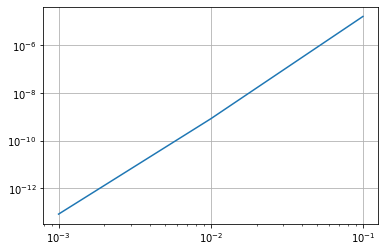

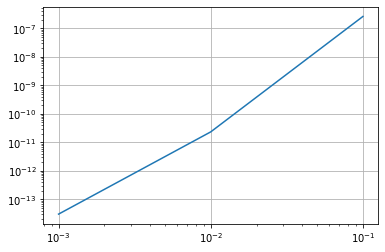

In [9]:
xErr = []
yErr = []
xxErr = []
for i in range(len(hVec)-1):
    xErr.append(abs((xAtOne[i]-xAtOne[-1])/xAtOne[-1]))
    yErr.append(abs((yAtOne[i]-yAtOne[-1])/yAtOne[-1]))
    xxErr.append(hVec[i])
    
plt.figure(1)
plt.loglog(xxErr,xErr)
plt.grid(True)
    
plt.figure(2)
plt.loglog(xxErr,yErr)
plt.grid(True)

In [10]:
def LogErr(x1,x2,y1,y2):
    return((np.log(y1)-np.log(y2))/(np.log(x1)-np.log(x2)))

for i in range(len(hVec)-2):
    print("For h=%8.2e to %8.2e Improvement (log) for x/y: %8.4f and %8.4f "%(hVec[i],hVec[i+1], LogErr(hVec[i],hVec[i+1],xErr[i],xErr[i+1]),LogErr(hVec[i],hVec[i+1],yErr[i],yErr[i+1])))
print("For h=%8.2e to %8.2e Improvement (log) for x/y: %8.4f and %8.4f "%(hVec[0],hVec[2], LogErr(hVec[0],hVec[2],xErr[0],xErr[2]),LogErr(hVec[0],hVec[2],yErr[0],yErr[2])))

For h=1.00e-01 to 1.00e-02 Improvement (log) for x/y:   4.2906 and   4.0495 
For h=1.00e-02 to 1.00e-03 Improvement (log) for x/y:   3.9971 and   2.8853 
For h=1.00e-01 to 1.00e-03 Improvement (log) for x/y:   4.1438 and   3.4674 
